# ColorSchemesInvert

------------------------------

ColorSchemesInvert.jl provides a function, `invert(cscheme, c)`, which is the inverse of `get(cscheme, x)` provided by [JuliaGraphics/ColorSchemes.jl](http://github.com/JuliaGraphics/ColorSchemes.jl).

`invert` places a *color* within a colorscheme, by converting the color to a value representing its position on the colorscheme's axis.

In [1]:
using ColorSchemesInvert, ColorSchemes, Colors

In [2]:
ColorSchemes.darkrainbow

## Examples

In [3]:
invert(ColorSchemes.darkrainbow, RGB(1,0,0))  # Red

0.9

In [4]:
invert(ColorSchemes.darkrainbow, RGB(0,1,0))  # Green

0.5484818351995914

In [5]:
invert(ColorSchemes.darkrainbow, RGB(0,0,1))  # Blue

0.04946640675057849

In [6]:
invert(ColorSchemes.darkrainbow, ColorSchemes.darkrainbow[2])  # darker blue

0.1

## Motivating Example
One use-case for `invert` is to convert a heat-map image into an Array of continuous values, e.g. temperature.

In this example, we will convert a heat-map style image representing elevation in the United States into an Array of elevations.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3011k  100 3011k    0     0  20.1M      0 --:--:-- --:--:-- --:--:-- 12.0M

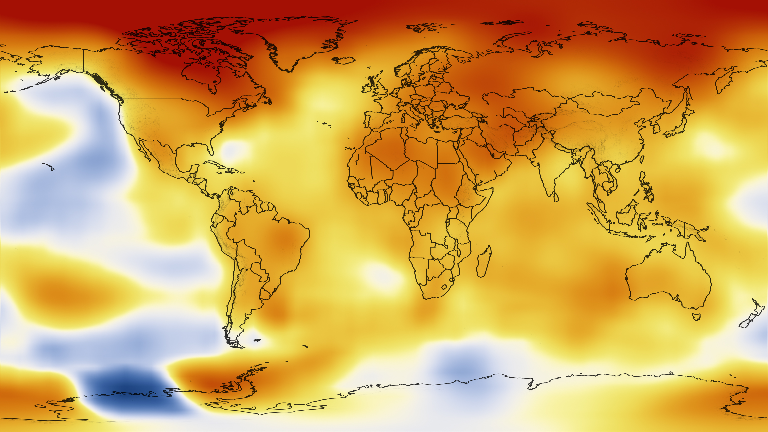

In [7]:
using Images, FileIO
img = download("https://www.nasa.gov/images/content/719282main_2008_2012_printdata.1462.jpg") |> load
img = imresize(img, Tuple(Int(x) for x in size(img).*0.2));
display(img)

In [8]:
ColorSchemes.temperaturemap

In [9]:
temps = [invert(ColorSchemes.temperaturemap, pixel) for pixel in img]

432×768 Array{Float64,2}:
 0.975615  0.975615  0.975615  0.975615  …  0.975615  0.975615  0.975615
 0.975484  0.975767  0.975615  0.975615     0.975615  0.975615  0.975767
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615  …  0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615  …  0.975615  0.975615  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975899  0.975899  0.975615
 0.975615  0.975615  0.975615  0.975615     0.975739  0.975739  0.975899
 ⋮                       

Now we have converted the data from its original colorscheme to a continuous value, which makes it possible to process as data.

For example, we could find the coldest and warmest places on earth:

In [10]:
mintemp,maxtemp = ind2sub(temps, indmin(temps)), ind2sub(temps, indmax(temps))

((397, 127), (17, 314))

Finally, we can display the new, continous values as a grayscale, representing 0 to 1 as black to white:

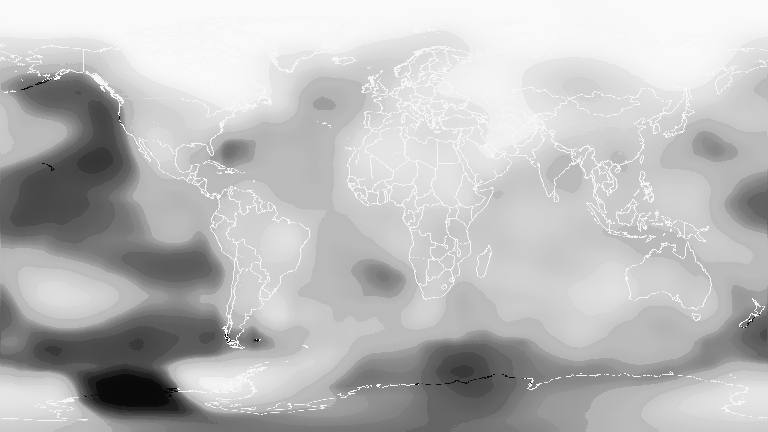

In [11]:
Gray.(temps)